# Sony Analytics Predictive Model

## Load in Required Packages

In [ ]:
# Load in required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from tabulate import tabulate

!pip install six
from six import StringIO

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder

## Data Cleaning

In [ ]:
# Load in the Dataset
imdb = pd.read_csv("TMDB_movie_data.csv")

In [ ]:
# Get information on the dataset
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12488 entries, 0 to 12487
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     12488 non-null  int64  
 1   title                  12488 non-null  object 
 2   vote_average           12488 non-null  float64
 3   vote_count             12488 non-null  int64  
 4   release_date           12488 non-null  object 
 5   revenue                12488 non-null  int64  
 6   categorized revenue2   12488 non-null  object 
 7   runtime                12488 non-null  int64  
 8   budget                 12488 non-null  int64  
 9   original_language      12488 non-null  object 
 10  popularity             12488 non-null  float64
 11  genre                  12488 non-null  object 
 12  production_companies2  11863 non-null  object 
 13  production_country     12488 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.3+ 

In [ ]:
# Check for Na's
imdb.isnull().sum()

id                         0
title                      0
vote_average               0
vote_count                 0
release_date               0
revenue                    0
categorized revenue2       0
runtime                    0
budget                     0
original_language          0
popularity                 0
genre                      0
production_companies2    625
production_country         0
dtype: int64

In [ ]:
# Check proportion of the rows with missing values
imdb.isna().sum() / len(imdb)

id                       0.000000
title                    0.000000
vote_average             0.000000
vote_count               0.000000
release_date             0.000000
revenue                  0.000000
categorized revenue2     0.000000
runtime                  0.000000
budget                   0.000000
original_language        0.000000
popularity               0.000000
genre                    0.000000
production_companies2    0.050048
production_country       0.000000
dtype: float64

It is only about 5% of the rows. We can remove these.

In [ ]:
# Remove the rows with the missing values
imdb = imdb.dropna()
# Check that the rows with NA's were removed
imdb.isnull().sum()

id                       0
title                    0
vote_average             0
vote_count               0
release_date             0
revenue                  0
categorized revenue2     0
runtime                  0
budget                   0
original_language        0
popularity               0
genre                    0
production_companies2    0
production_country       0
dtype: int64

In [ ]:
# Check for duplicate rows
imdb.duplicated().sum()

0

In [ ]:
# We need to convert some of the column types to match what they should be
col_to_convert = ['title','categorized revenue2','original_language',
                  'genre','production_companies2','production_country']
imdb[col_to_convert] = imdb[col_to_convert].astype(str)

# Check that it worked
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11863 entries, 0 to 12487
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     11863 non-null  int64  
 1   title                  11863 non-null  object 
 2   vote_average           11863 non-null  float64
 3   vote_count             11863 non-null  int64  
 4   release_date           11863 non-null  object 
 5   revenue                11863 non-null  int64  
 6   categorized revenue2   11863 non-null  object 
 7   runtime                11863 non-null  int64  
 8   budget                 11863 non-null  int64  
 9   original_language      11863 non-null  object 
 10  popularity             11863 non-null  float64
 11  genre                  11863 non-null  object 
 12  production_companies2  11863 non-null  object 
 13  production_country     11863 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.4+ MB


<ipython-input-8-9e44aea35713>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb[col_to_convert] = imdb[col_to_convert].astype(str)


In [ ]:
# Convert the release_date column to date type
imdb['release_date'] = pd.to_datetime(imdb['release_date'])

<ipython-input-9-4dc594746249>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  imdb['release_date'] = pd.to_datetime(imdb['release_date'])


In [ ]:
# Let's rename some columns to be better formatted
# Renaming multiple columns
imdb.rename(columns={'categorized revenue2': 'categorized_rev',
                     'production_companies2': 'production_companies'}, inplace=True)

# Check that it worked
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11863 entries, 0 to 12487
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    11863 non-null  int64         
 1   title                 11863 non-null  object        
 2   vote_average          11863 non-null  float64       
 3   vote_count            11863 non-null  int64         
 4   release_date          11863 non-null  datetime64[ns]
 5   revenue               11863 non-null  int64         
 6   categorized_rev       11863 non-null  object        
 7   runtime               11863 non-null  int64         
 8   budget                11863 non-null  int64         
 9   original_language     11863 non-null  object        
 10  popularity            11863 non-null  float64       
 11  genre                 11863 non-null  object        
 12  production_companies  11863 non-null  object        
 13  production_country   

In [ ]:
# Get dimensions of the data
imdb.shape

(11863, 14)

In [ ]:
# Look at the first few rows of the data
imdb.head()

,id,title,vote_average,vote_count,release_date,revenue,categorized_rev,runtime,budget,original_language,popularity,genre,production_companies,production_country
0,723889,Witness to a Rape,2.000,1,2020-07-10,100000,Medium,80,100000,ar,0.686,Documentary,Zoom in Focus Productions,Egypt
2,447553,Restricted Area Baron Palace,10.000,1,2016-11-16,400000,Medium,85,250000,ar,0.600,Thriller,digital eye art production,Egypt
3,27205,Inception,8.364,34495,2010-07-15,825532764,Very High,148,160000000,en,83.952,Action,Legendary Pictures,United Kingdom
4,157336,Interstellar,8.417,32571,2014-11-05,701729206,Very High,169,165000000,en,140.241,Adventure,Legendary Pictures,United Kingdom
5,155,The Dark Knight,8.512,30619,2008-07-16,1004558444,Very High,152,185000000,en,130.643,Drama,DC Comics,United Kingdom


In [ ]:
# Basic descriptive statistics of each column
round(imdb.describe(),2)

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity
count,11863.00,11863.00,11863.00,11863,1.186300e+04,11863.00,1.186300e+04,11863.00
mean,197856.89,6.09,1275.28,2009-11-28 20:23:48.711118592,5.326241e+07,101.52,1.792094e+07,17.03
min,5.00,0.00,0.00,1974-01-01 00:00:00,1.000000e+00,1.00,0.000000e+00,0.00
25%,11848.00,5.68,40.00,1998-09-25 00:00:00,6.152135e+05,91.00,0.000000e+00,5.03
50%,44129.00,6.30,258.00,2009-11-13 00:00:00,6.800000e+06,101.00,3.000000e+06,11.60
75%,321435.00,6.92,1125.50,2017-08-11 00:00:00,3.902779e+07,114.00,2.000000e+07,18.54
max,1265226.00,10.00,34495.00,2073-12-26 00:00:00,2.923706e+09,960.00,4.600000e+08,2994.36
std,280634.26,1.64,2783.34,NaN,1.428965e+08,28.73,3.495943e+07,55.56


In [ ]:
# Remove the columns that are not needed
imdb = imdb.drop(['vote_average','popularity'], axis=1)

## Data Exploration

In [ ]:
# Quick check on info on the dataframe to see where we're at
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11863 entries, 0 to 12487
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    11863 non-null  int64         
 1   title                 11863 non-null  object        
 2   vote_count            11863 non-null  int64         
 3   release_date          11863 non-null  datetime64[ns]
 4   revenue               11863 non-null  int64         
 5   categorized_rev       11863 non-null  object        
 6   runtime               11863 non-null  int64         
 7   budget                11863 non-null  int64         
 8   original_language     11863 non-null  object        
 9   genre                 11863 non-null  object        
 10  production_companies  11863 non-null  object        
 11  production_country    11863 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 1.2+ MB


In [ ]:
# Create a new column that tracks the month of the release date
imdb['release_month'] = imdb['release_date'].dt.month
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11863 entries, 0 to 12487
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    11863 non-null  int64         
 1   title                 11863 non-null  object        
 2   vote_count            11863 non-null  int64         
 3   release_date          11863 non-null  datetime64[ns]
 4   revenue               11863 non-null  int64         
 5   categorized_rev       11863 non-null  object        
 6   runtime               11863 non-null  int64         
 7   budget                11863 non-null  int64         
 8   original_language     11863 non-null  object        
 9   genre                 11863 non-null  object        
 10  production_companies  11863 non-null  object        
 11  production_country    11863 non-null  object        
 12  release_month         11863 non-null  int32         
dtypes: datetime64[ns](1),

In [ ]:
# Check the number of production companies
imdb.production_companies.nunique()

5403

This number is way too high to do analysis on. The model would be extremely complicated, take forever to train and run. It might be a good idea to split the companies into bins based on total revenue earned.

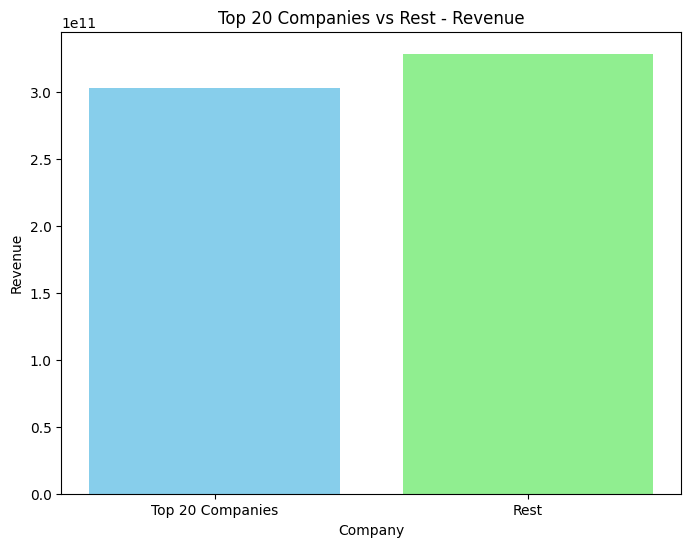

In [ ]:
# Group by production companies and sum the revenue
company_revenue = imdb.groupby('production_companies')['revenue'].sum()

# Sort the results in descending order
sorted_companies = company_revenue.sort_values(ascending=False)

# Get the top 20 companies
top_20_companies = sorted_companies.head(20)

# Calculate total revenue from the top 20 companies
top_20_revenue = top_20_companies.sum()

# Calculate total revenue from all companies excluding the top 20
rest_revenue = sorted_companies[~sorted_companies.index.isin(top_20_companies.index)].sum()

# Create a DataFrame for visualization
data = pd.DataFrame({'Company': ['Top 20 Companies', 'Rest'],
                     'Revenue': [top_20_revenue, rest_revenue]})

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(data['Company'], data['Revenue'], color=['skyblue', 'lightgreen'])
plt.title('Top 20 Companies vs Rest - Revenue')
plt.xlabel('Company')
plt.ylabel('Revenue')
plt.show()


The top 20 production companies make up nearly half of the total revenue from the data. Let's split the production_companies into two values.

In [ ]:
# Create the new column
imdb['top20_production_company'] = imdb['production_companies'].isin(top_20_companies)

imdb.head()

,id,title,vote_count,release_date,revenue,categorized_rev,runtime,budget,original_language,genre,production_companies,production_country,release_month,top20_production_company
0,723889,Witness to a Rape,1,2020-07-10,100000,Medium,80,100000,ar,Documentary,Zoom in Focus Productions,Egypt,7,False
2,447553,Restricted Area Baron Palace,1,2016-11-16,400000,Medium,85,250000,ar,Thriller,digital eye art production,Egypt,11,False
3,27205,Inception,34495,2010-07-15,825532764,Very High,148,160000000,en,Action,Legendary Pictures,United Kingdom,7,False
4,157336,Interstellar,32571,2014-11-05,701729206,Very High,169,165000000,en,Adventure,Legendary Pictures,United Kingdom,11,False
5,155,The Dark Knight,30619,2008-07-16,1004558444,Very High,152,185000000,en,Drama,DC Comics,United Kingdom,7,False


In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11863 entries, 0 to 12487
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        11863 non-null  int64         
 1   title                     11863 non-null  object        
 2   vote_count                11863 non-null  int64         
 3   release_date              11863 non-null  datetime64[ns]
 4   revenue                   11863 non-null  int64         
 5   categorized_rev           11863 non-null  object        
 6   runtime                   11863 non-null  int64         
 7   budget                    11863 non-null  int64         
 8   original_language         11863 non-null  object        
 9   genre                     11863 non-null  object        
 10  production_companies      11863 non-null  object        
 11  production_country        11863 non-null  object        
 12  release_month          

In [ ]:
# Remove the columns that are not needed
imdb = imdb.drop(['id','title','release_date','revenue','production_companies'], axis=1)
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11863 entries, 0 to 12487
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   vote_count                11863 non-null  int64 
 1   categorized_rev           11863 non-null  object
 2   runtime                   11863 non-null  int64 
 3   budget                    11863 non-null  int64 
 4   original_language         11863 non-null  object
 5   genre                     11863 non-null  object
 6   production_country        11863 non-null  object
 7   release_month             11863 non-null  int32 
 8   top20_production_company  11863 non-null  bool  
dtypes: bool(1), int32(1), int64(3), object(4)
memory usage: 799.4+ KB


## Encoding

In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11863 entries, 0 to 12487
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   vote_count                11863 non-null  int64 
 1   categorized_rev           11863 non-null  object
 2   runtime                   11863 non-null  int64 
 3   budget                    11863 non-null  int64 
 4   original_language         11863 non-null  object
 5   genre                     11863 non-null  object
 6   production_country        11863 non-null  object
 7   release_month             11863 non-null  int32 
 8   top20_production_company  11863 non-null  bool  
dtypes: bool(1), int32(1), int64(3), object(4)
memory usage: 799.4+ KB


In [ ]:
#Ordinally encode the target variable (categorized revenue)
# Extract the target variable
target_variable = imdb[['categorized_rev']]

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the target variable
encoded_target = encoder.fit_transform(target_variable)

# Replace the original 'categorized_revenue' column with the encoded values
imdb['categorized_rev'] = encoded_target

# Convert the new categorized_rev column into integer
imdb['categorized_rev'] = imdb['categorized_rev'].astype(int)

# Confirm the changes were made
imdb.head()

,vote_count,categorized_rev,runtime,budget,original_language,genre,production_country,release_month,top20_production_company
0,1,2,80,100000,ar,Documentary,Egypt,7,False
2,1,2,85,250000,ar,Thriller,Egypt,11,False
3,34495,3,148,160000000,en,Action,United Kingdom,7,False
4,32571,3,169,165000000,en,Adventure,United Kingdom,11,False
5,30619,3,152,185000000,en,Drama,United Kingdom,7,False


In [ ]:
# One-Hot Encoding the categorical variables
# Select the columns to encode
columns_to_encode = ['original_language','genre','production_country']

# Encode the variables
imdb_encoded = pd.get_dummies(imdb, columns = columns_to_encode, drop_first = True)

In [ ]:
# Check that the encoding worked
imdb_encoded.head()

,vote_count,categorized_rev,runtime,budget,release_month,top20_production_company,original_language_am,original_language_ar,original_language_be,original_language_bg,...,production_country_Uganda,production_country_Ukraine,production_country_United Arab Emirates,production_country_United Kingdom,production_country_United States of America,production_country_Uruguay,production_country_Uzbekistan,production_country_Venezuela,production_country_Vietnam,production_country_Yemen
0,1,2,80,100000,7,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2,85,250000,11,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,34495,3,148,160000000,7,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,32571,3,169,165000000,11,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,30619,3,152,185000000,7,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
# Check for missing values
imdb.isnull().sum()

vote_count                  0
categorized_rev             0
runtime                     0
budget                      0
original_language           0
genre                       0
production_country          0
release_month               0
top20_production_company    0
dtype: int64

## Initial Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data into features (X) and target variable (y)
X = imdb_encoded.drop(columns=['categorized_rev'])
y = imdb_encoded['categorized_rev']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier
tree_model.fit(X_train, y_train)

# Evaluate the decision tree model
train_accuracy = tree_model.score(X_train, y_train)
test_accuracy = tree_model.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9998946259220232
Testing Accuracy: 0.5705857564264644


In [ ]:
# Testing the data with the created tree
tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)

In [ ]:
# Accuracy Score
print(accuracy_score(y_test,y_pred))

0.5705857564264644


In [ ]:
# Confusion Matrix
data_cm = confusion_matrix(y_test, y_pred)
print(data_cm)

[[333  23 215 162]
 [ 31 158  69   3]
 [208  74 299  45]
 [150   3  36 564]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.45      0.46       733
           1       0.61      0.61      0.61       261
           2       0.48      0.48      0.48       626
           3       0.73      0.75      0.74       753

    accuracy                           0.57      2373
   macro avg       0.57      0.57      0.57      2373
weighted avg       0.57      0.57      0.57      2373



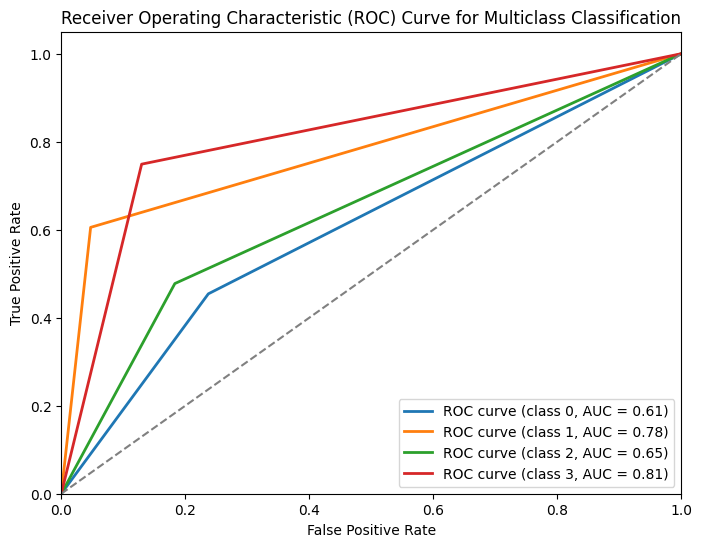

In [ ]:
# Calculate ROC curve and AUC score for each class
n_classes = len(tree_model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    y_test_binary = (y_test == i)  # Create binary target for the current class
    y_prob_class = tree_model.predict_proba(X_test)[:, i]  # Predict probabilities for the current class
    fpr[i], tpr[i], _ = roc_curve(y_test_binary, y_prob_class)
    roc_auc[i] = roc_auc_score(y_test_binary, y_prob_class)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class %d, AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

## Tuning the Decision Tree

In [ ]:
# Split Criteria (Entropy or Gini)
results_split = []
recall = []
precision = []
f1 = []
split_options = ["entropy","gini"]
for trees in split_options:
  model = DecisionTreeClassifier(criterion= trees, random_state = 42)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test==y_pred)
  results_split.append(accuracy)
  recall.append(recall_score(y_test,y_pred, average = 'weighted'))
  precision.append(precision_score(y_test,y_pred, average = 'weighted'))
  f1.append(f1_score(y_test,y_pred, average = 'weighted'))

table = pd.DataFrame({"Split Criteria":split_options,
                      "Accuracy":results_split,
                      "Recall":recall,
                      "Precision":precision,
                      "F1 Score": f1})
table

,Split Criteria,Accuracy,Recall,Precision,F1 Score
0,entropy,0.569743,0.569743,0.570642,0.570174
1,gini,0.570586,0.570586,0.568474,0.569471


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

results_min_leaf = []
recall = []
precision = []
f1 = []
min_leaf_options = [5, 10, 15, 20, 25, 30, 35, 40]

for trees in min_leaf_options:
    model = DecisionTreeClassifier(min_samples_leaf=trees, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = np.mean(y_test == y_pred)
    results_min_leaf.append(accuracy)

    # Calculate recall, precision, and F1 score
    recall.append(recall_score(y_test, y_pred, average='weighted'))  # Use 'weighted' for multiclass
    precision.append(precision_score(y_test, y_pred, average='weighted'))  # Use 'weighted' for multiclass
    f1.append(f1_score(y_test, y_pred, average='weighted'))  # Use 'weighted' for multiclass

table2 = pd.DataFrame({"Minimum Sample Leaf": min_leaf_options,
                       "Accuracy": results_min_leaf,
                       "Recall": recall,
                       "Precision": precision,
                       "F1 Score": f1})

print(table2)


   Minimum Sample Leaf  Accuracy    Recall  Precision  F1 Score
0                    5  0.585335  0.585335   0.587868  0.586071
1                   10  0.606405  0.606405   0.610465  0.607342
2                   15  0.632111  0.632111   0.642701  0.634702
3                   20  0.639275  0.639275   0.647840  0.641403
4                   25  0.633375  0.633375   0.640801  0.634330
5                   30  0.644332  0.644332   0.664704  0.646879
6                   35  0.639697  0.639697   0.662954  0.643443
7                   40  0.640961  0.640961   0.661771  0.642921


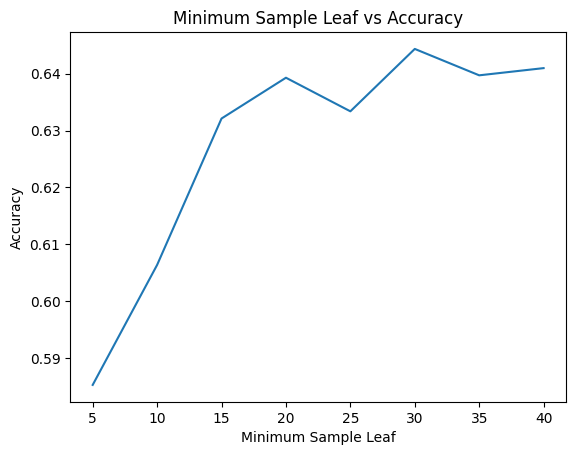

In [ ]:
#Plot to see which level is best
plt.plot(min_leaf_options,results_min_leaf)
plt.title("Minimum Sample Leaf vs Accuracy")
plt.xlabel("Minimum Sample Leaf")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Maximum Feature
results_max_feat = []
recall = []
precision = []
f1 = []
max_feat_options = ["auto",None,0.3,0.4,0.5,0.6,0.7,0.8]
for trees in max_feat_options:
  model = DecisionTreeClassifier(max_features=trees, random_state = 42)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test==y_pred)
  results_max_feat.append(accuracy)
  recall.append(recall_score(y_test,y_pred, average = 'weighted'))
  precision.append(precision_score(y_test,y_pred, average = 'weighted'))
  f1.append(f1_score(y_test,y_pred, average = 'weighted'))

table3 = pd.DataFrame({"Maximum Feature":max_feat_options,
                      "Accuracy":results_max_feat,
                      "Recall":recall,
                      "Precision":precision,
                      "F1 Score": f1})
table3

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


,Maximum Feature,Accuracy,Recall,Precision,F1 Score
0,auto,0.549937,0.549937,0.549454,0.549690
1,None,0.570586,0.570586,0.568474,0.569471
2,0.3,0.581121,0.581121,0.579963,0.580510
3,0.4,0.574800,0.574800,0.575004,0.574791
4,0.5,0.568900,0.568900,0.569802,0.569339
5,0.6,0.567214,0.567214,0.562627,0.564620
6,0.7,0.573957,0.573957,0.573977,0.573847
7,0.8,0.567214,0.567214,0.565513,0.566212


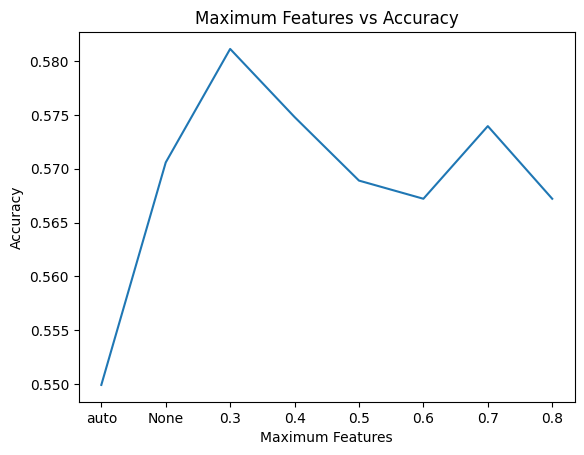

In [ ]:
plt.plot(["auto","None",0.3,0.4,0.5,0.6,0.7,0.8],results_max_feat)
plt.title("Maximum Features vs Accuracy")
plt.xlabel("Maximum Features")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Maximum Depth
results_max_dep = []
recall = []
precision = []
f1 = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
  model = DecisionTreeClassifier(max_depth = trees, random_state = 42)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test==y_pred)
  results_max_dep.append(accuracy)
  recall.append(recall_score(y_test,y_pred, average = 'weighted'))
  precision.append(precision_score(y_test,y_pred, average = 'weighted'))
  f1.append(f1_score(y_test,y_pred, average = 'weighted'))

table4 = pd.DataFrame({"Maximum Depth":max_depth_options,
                      "Accuracy":results_max_dep,
                      "Recall":recall,
                      "Precision":precision,
                      "F1 Score": f1})
table4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Maximum Depth,Accuracy,Recall,Precision,F1 Score
0,2,0.549515,0.549515,0.524437,0.512802
1,4,0.621155,0.621155,0.661636,0.618052
2,6,0.636325,0.636325,0.656763,0.637804
3,8,0.638011,0.638011,0.654059,0.638754
4,10,0.635904,0.635904,0.651054,0.637457
5,12,0.612727,0.612727,0.623940,0.615712
6,14,0.604720,0.604720,0.610989,0.606457
7,16,0.593763,0.593763,0.599750,0.596193
8,18,0.592499,0.592499,0.593581,0.592979
9,20,0.583649,0.583649,0.584653,0.583979


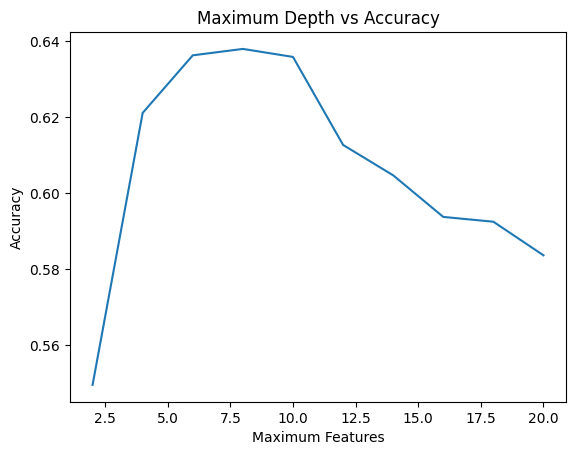

In [ ]:
# Plot to see which level is best
plt.plot(max_depth_options,results_max_dep)
plt.title("Maximum Depth vs Accuracy")
plt.xlabel("Maximum Features")
plt.ylabel("Accuracy")
plt.show()

## Creation of Tuned Tree

The best hyper-parameter values were as follows:


1.   Split Criteria: Gini Index
2.   Minimum Sample Leaf: 30
3.   Maximum Feature: 0.5
4.   Maximum Depth: 8

In [ ]:
# Create tree with hyper-parameters above:
dtree = DecisionTreeClassifier(max_depth = 8, random_state = 42,
                               max_features = 0.3, min_samples_leaf= 30, criterion = 'gini')
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

In [ ]:
# Confusion Matrix
data_cm = confusion_matrix(y_test, y_pred)
print(data_cm)

[[377   8 157 191]
 [ 26 122 111   2]
 [244  30 312  40]
 [139   0  32 582]]


In [ ]:
# Accuracy Score
print(accuracy_score(y_test,y_pred))

0.5870206489675516


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.51      0.50       733
           1       0.76      0.47      0.58       261
           2       0.51      0.50      0.50       626
           3       0.71      0.77      0.74       753

    accuracy                           0.59      2373
   macro avg       0.62      0.56      0.58      2373
weighted avg       0.59      0.59      0.59      2373



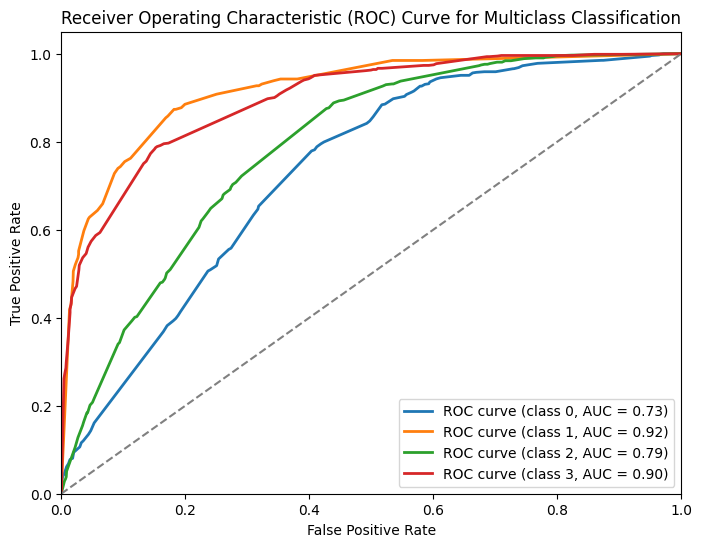

In [ ]:
# Calculate ROC curve and AUC score for each class
n_classes = len(dtree.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    y_test_binary = (y_test == i)  # Create binary target for the current class
    y_prob_class = dtree.predict_proba(X_test)[:, i]  # Predict probabilities for the current class
    fpr[i], tpr[i], _ = roc_curve(y_test_binary, y_prob_class)
    roc_auc[i] = roc_auc_score(y_test_binary, y_prob_class)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class %d, AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

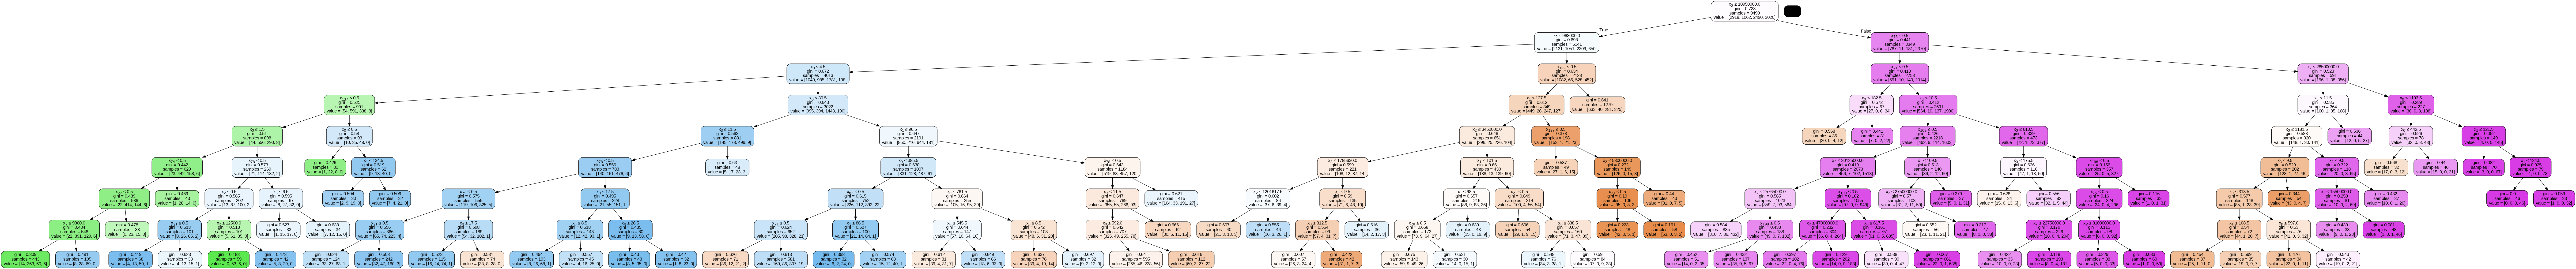

In [ ]:
# Graph the decision tree
graph_data = StringIO()
export_graphviz(dtree, out_file= graph_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(graph_data.getvalue())
Image(graph.create_png())

In [ ]:
# Find the features used in the final decision tree
# Get the indices of features used in splits
used_feature_indices = dtree.tree_.feature

# Get the names of features used in splits and remove duplicates
used_feature_names = set([feature_names[i] for i in used_feature_indices if i != -2])

# Convert set of unique feature names to a list
unique_feature_names_list = list(used_feature_names)

print("Unique features used by the tuned decision tree (dtree):")
for feature in unique_feature_names_list:
    print(feature)
print("Count of unique features used by the tuned decision tree (dtree):", len(unique_feature_names_list))

Unique features used by the tuned decision tree (dtree):
genre_Animation
vote_count
runtime
release_month
production_country_Canada
production_country_United Kingdom
original_language_es
genre_Horror
original_language_hi
genre_Comedy
production_country_United States of America
genre_Drama
budget
production_country_India
original_language_en
Count of unique features used by the tuned decision tree (dtree): 15
